# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

In [3]:
# Algumas configurações para o matplotlib.
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

In [4]:
countries = pd.read_csv("countries.csv", decimal=',')

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

In [6]:
# O separador decimal foi tratado na importação do CSV
print("Dimensões:", countries.shape)
print("\nColunas:", countries.columns)
print("\nPorcentagem de NAs\n", countries.isna().sum()/countries.shape[0])

Dimensões: (227, 20)

Colunas: Index(['Country', 'Region', 'Population', 'Area', 'Pop_density',
       'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'GDP',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

Porcentagem de NAs
 Country             0.000000
Region              0.000000
Population          0.000000
Area                0.000000
Pop_density         0.000000
Coastline_ratio     0.000000
Net_migration       0.013216
Infant_mortality    0.013216
GDP                 0.004405
Literacy            0.079295
Phones_per_1000     0.017621
Arable              0.008811
Crops               0.008811
Other               0.008811
Climate             0.096916
Birthrate           0.013216
Deathrate           0.017621
Agriculture         0.066079
Industry            0.070485
Service             0.066079
dtype: float64


In [7]:
countries['Region'] = countries['Region'].str.strip()
countries['Country'] = countries['Country'].str.strip()

## Inicia sua análise a partir daqui

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [8]:
def q1():
    region_unique = countries.Region.unique()
    region_unique.sort()
    return list(region_unique)

print('Regiões únicas em ordem alfabética:', q1())

Regiões únicas em ordem alfabética: ['ASIA (EX. NEAR EAST)', 'BALTICS', 'C.W. OF IND. STATES', 'EASTERN EUROPE', 'LATIN AMER. & CARIB', 'NEAR EAST', 'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA', 'SUB-SAHARAN AFRICA', 'WESTERN EUROPE']


## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [9]:
def q2():
    discretizer = KBinsDiscretizer(n_bins = 10, encode='ordinal', strategy='quantile')
    discretizer.fit(countries[['Pop_density']])
    pop_density_bins = discretizer.transform(countries[['Pop_density']])
    bin_9 = np.where(pop_density_bins == 9)
    return int(len(bin_9[0]))

print(q2(), 'países acima do percentil 90')

23 países acima do percentil 90


# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [10]:
def q3():
    one_hot_Region = len(countries.Region.unique())
    one_hot_Climate = len(countries.Climate.unique())
    return int(one_hot_Region + one_hot_Climate)

print('Após aplicar o one-hot encoding em Region e Climate, teríamos', q3(), 'novas variáveis')

Após aplicar o one-hot encoding em Region e Climate, teríamos 18 novas variáveis


## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [11]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [12]:
def q4():
    # Numeric columns
    numeric_col = countries.select_dtypes(include=np.number).columns.tolist()
    # Pipeline
    numeric_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ("standardize", StandardScaler())
    ])
    
    # Fitting and Applying pipeline
    numeric_transformed = numeric_pipe.fit_transform(countries[numeric_col])
    
    pos = numeric_col.index('Arable')
    
    # Applying pipeline
    test_country_df = pd.DataFrame([test_country], columns = countries.columns)
    test_country_transformed = numeric_pipe.transform(test_country_df[numeric_col])
    return float(round(test_country_transformed[0][pos], 3))

print('Variável Arable após o pipeline:', q4())

Variável Arable após o pipeline: -1.047


## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

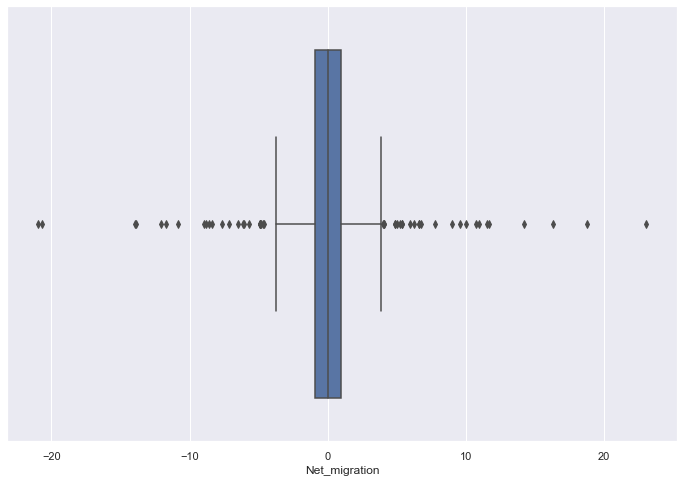

In [13]:
sns.boxplot(countries['Net_migration'].dropna())

In [14]:
def q5():
    net_migration = countries.Net_migration.dropna()

    quartil1, quartil3 = np.quantile(net_migration, [0.25, 0.75])
    IQR = quartil3 - quartil1
    outliers_abaixo, outliers_acima = sum(net_migration < (quartil1 - 1.5*IQR)), sum(net_migration > (quartil3 + 1.5*IQR))
    return (outliers_abaixo, outliers_acima, False)

print(q5())
print("Não removeria, temos muitos valores outliers segundo essa regra. E dado o contexto as quantidades de emigrantes e imigrantes que fazem a taxa ter valores discrepantes são características importantes dos países.")

(24, 26, False)
Não removeria, temos muitos valores outliers segundo essa regra. E dado o contexto as quantidades de emigrantes e imigrantes que fazem a taxa ter valores discrepantes são características importantes dos países.


## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [15]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [16]:
def q6():
    token = CountVectorizer(vocabulary = ['phone'])
    newsgroup_token = token.fit_transform(newsgroup.data)
    return int(newsgroup_token.sum())

print("A palavra phone aparece", q6(), "vezes")

A palavra phone aparece 213 vezes


## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [17]:
def q7():
    tf_idf = TfidfVectorizer()
    newsgroup_tf_idf = tf_idf.fit_transform(newsgroup.data)
    
    words = tf_idf.get_feature_names()
    result = pd.DataFrame(newsgroup_tf_idf.toarray(), columns = words)
    
    return float(round(result['phone'].sum(),3))

print('O TF-IDF da palavra phone é', q7())

O TF-IDF da palavra phone é 8.888
